In [8]:
%%capture
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/DeepLearning/Second/kaggle'

In [10]:
!pwd

/content


In [11]:
%cd /content/drive/MyDrive/DeepLearning/Second/kaggle

/content/drive/MyDrive/DeepLearning/Second/kaggle


In [12]:
!kaggle datasets download -d  phylake1337/fire-dataset

 98% 380M/387M [00:04<00:00, 86.9MB/s]
100% 387M/387M [00:04<00:00, 95.7MB/s]


In [13]:
%%capture
!unzip /content/drive/MyDrive/DeepLearning/Second/kaggle/fire-dataset.zip -d /content/drive/MyDrive/DeepLearning/Second/Dataset

# Start Code

In [17]:
import pandas as pd
import numpy as np
import cv2
import glob

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [87]:
from joblib import dump

In [77]:
feature_vectors = []

In [76]:
labels = []

In [36]:
def get_label(address):
  label = address.split("/")[-2]
  labels.append(label)

In [78]:
#Import Dataset
for i,address in enumerate(glob.glob('/content/drive/MyDrive/DeepLearning/Second/Dataset/fire_dataset/*/**')):
  #Read Image
  img = cv2.imread(address)
  # Check if the image is loaded successfully
  if img is not None:
      # Resize image
      img = cv2.resize(img ,(32,32))
      # Normalize image
      img = img/255.0
      #Flat
      img = img.flatten()
      #append
      feature_vectors.append(img)
      #Give label
      get_label(address)
  else:
      print("Failed to load the image:", address)

  if i % 100 == 0 :
    print(f"Info :{i+1} processed")
print(f"Finished")

Info :1 processed
Info :101 processed
Info :201 processed
Info :301 processed
Info :401 processed
Info :501 processed
Info :601 processed
Info :701 processed
Info :801 processed
Failed to load the image: /content/drive/MyDrive/DeepLearning/Second/Dataset/fire_dataset/non_fire_images/non_fire.189.png
Info :901 processed
Finished


In [79]:
np_feature_vectors = np.array(feature_vectors)

In [80]:
np_feature_vectors.shape


(998, 3072)

In [81]:
len(labels)

998

In [82]:
#Split
x_train, x_test, y_train, y_test =train_test_split(np_feature_vectors, labels, test_size=0.2,random_state=42)

In [83]:
#Model
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [85]:
#Prediction
accuracy = model.score(x_test, y_test)
accuracy

0.84

In [86]:
#Prediction
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.84

In [89]:
dump(model, '/content/drive/MyDrive/DeepLearning/Second/knn.joblib')

['/content/drive/MyDrive/DeepLearning/Second/knn.joblib']

#Using

In [90]:
from joblib import load

In [91]:
model = load('/content/drive/MyDrive/DeepLearning/Second/knn.joblib')

In [92]:
#Give img
img = cv2.imread('/content/drive/MyDrive/DeepLearning/Second/Dataset/fire_dataset/fire_images/fire.10.png')


In [94]:
#Preprocessing
resized_img = cv2.resize(img, (32,32))
normalize_img = resized_img/255.0
flatten_img = normalize_img.flatten()

In [98]:
flatten_img.shape

(3072,)

In [100]:
np.array(flatten_img).shape

(3072,)

In [99]:
np.array([flatten_img]).shape

(1, 3072)

In [108]:
pred_img = model.predict(np.array([flatten_img]))[0]
out_img = cv2.putText(img ,pred_img, (20 ,40),cv2.FONT_HERSHEY_SIMPLEX, 0.9,(10,40,167),2)

In [106]:
import matplotlib.pyplot as plt

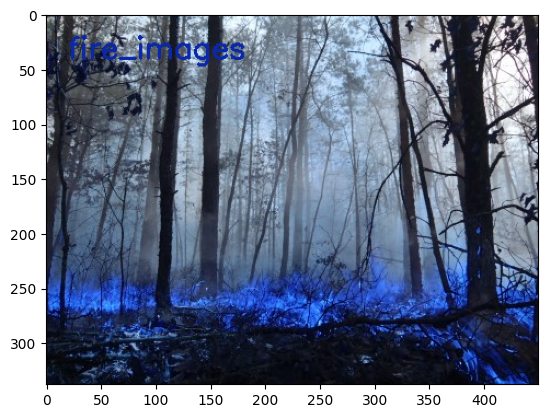

In [109]:
plt.imshow(out_img)